<a href="https://colab.research.google.com/github/nxthxnael/Machine-Learning-Essentials/blob/master/Practical%20Session%201/Nathanael_Mutua_SC212_0588_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Algorithms**

## **Step 1**

I will import the Iris dataset from the scikit learn library.

> *It contains features for different iris flower species, which the model will learn to categorize.*

### **Loading & creating a dataframe for the Iris Dataset**

- I will run `sklearn.datasets import load_iris`
- I will also import pandas, load the dataset and create a dataframe

Then I will display the first few rows of the dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# loading the dataset
iris = load_iris()

In [2]:
# creating a dataframe

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# I'm adding the target column to include the additional information
# (numerical values representing the species)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


---
---


## **Step 2**
Carrying out the classification algorithms using 5 algorithms.

Where for each, you must follow a standard pipeline: **Train the model, make predictions, display the confusion matrix, and compute performance metrics**.

### **1. K Nearest Neighbour (KNN)**

**Got me wondering what exactlly is KNN?**
KNN is a **"lazy learner"** that does not build a formal model during training; instead, it stores the data and makes decisions during the prediction phase based on the classes of the closest neighbors.

Key considerationsI will have: Use the **"Rule of Thumb"** ($K = \sqrt{n}$) or **Cross-Validation** to select the best value for $K$.

Key steps:
1. import neccessry libraries
2. split the data
3. create the KNN model
4. fit the model
5. make predictions
6. display the confusion matrix
7. compute performance metrics




#### **1.1 Import Libraries**
importing necessary libraries for data handling, model training and evaluation

- `from sklearn.model_selection import train_test_split`

  Purpose: This function is used to split a dataset into two subsets: one for training the model and another for testing it.
- `from sklearn.neighbors import KNeighborsClassifier`

  Purpose: This imports the K-Nearest Neighbors (KNN) classifier (a simple, instance-based learning algorithm used for classification and regression tasks).
- `from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay`

  Purpose: These functions are used to evaluate the performance of the machine learning model.
- `import seaborn as sns`
  
  Purpose: Seaborn is a statistical data visualization library built on top of Matplotlib. It'll provide a high-level interface for drawing attractive and informative statistical graphics.
- `import matplotlib.pyplot as plt`

  Purpose: Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension, NumPy.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn

#### **1.2 Split the data**

Here we will be splitting the data into features (X) and target labels (y), and then further splitting those into training and testing sets, we'll ensure that the model can learn from one portion of the data while being evaluated on a separate, unseen portion.

My expected outcome:
- **X_train**: Contains 80% of the feature data for training the model.
- **X_test**: Contains 20% of the feature data for testing the model.
- **y_train**: Contains 80% of the target labels corresponding to X_train.
- **y_test**: Contains 20% of the target labels corresponding to X_test.

In [4]:
# Features
X = iris_df.drop('target', axis=1)

# Target variable
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **1.3 Train the KNN Model**

I will first carry out cross-validation technique to validate which is the best number of neighbors for my data.

The best number of neighbors is: 3


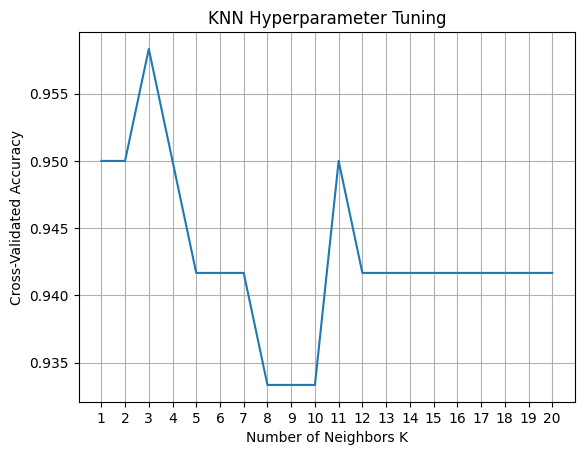

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to test
k_values = range(1, 21)
scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    scores.append(np.mean(cv_scores))

# Find the best k
best_k = k_values[np.argmax(scores)]
print(f'The best number of neighbors is: {best_k}')

# Plotting the results
plt.plot(k_values, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid()
plt.show()

I will then initialize the **classifier**

This parameter specifies the number of nearest neighbors to consider when making predictions. In this case, the model will look at the 3 closest data points in the training set to determine the class of a new data point.

In [6]:
# training the KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


#### **1.4 Making Predictions**

In [7]:
y_pred = knn.predict(X_test)

#### **Displaying the Confusion Matrix**

The confusion matrix typically has four components:

- **True Positives (TP)**: The number of instances correctly predicted as positive.
- **True Negatives (TN)**: The number of instances correctly predicted as negative.
- **False Positives (FP)**: The number of instances incorrectly predicted as positive (also known as Type I error).
- **False Negatives (FN)**: The number of instances incorrectly predicted as negative (also known as Type II error).

We should enter a code snippet that computes the confusion matrix for the KNN model's predictions, creates a visual representation of it, and displays the results.

This visualization will help in understanding how many instances were correctly or incorrectly classified for each class, providing valuable insights into the model's strengths and weaknesses.

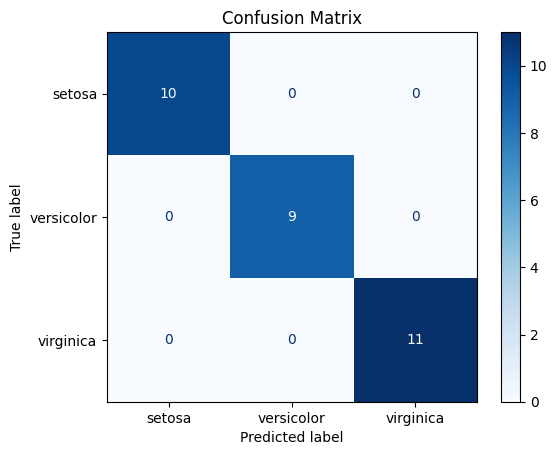

In [8]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **1.5 Compute Performance Metrics**

I will first calculate the accuracy of the KNN model, usually in theory it's

$\frac{TP + TN}{Total}$

Then I will generate a detailed classification report that provides additional performance metrics

Then finally, I will print out the accuracy mmodel and the detailed classification report

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print('Classification Report:\n', report)

Accuracy: 1.00
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---

### **2. Naive Bayes**
**Definition:** This is a family of probabilistic algorithms based on Bayes' theorem, used primarily for classification tasks. It is called "naive" because it makes a simplifying assumption that the features (or predictors) are conditionally independent given the class label. This means that the presence of one feature does not affect the presence of another feature within the same class.

Steps for Naive Bayes Classification
1. **Import Libraries:** Import the necessary libraries for data manipulation, modeling, and evaluation.

2. **Load the Dataset:** I already loaded it into a data frame

3. **Split the Dataset:** I already split the data into training and testing sets

4. **Train the Model:** Instantiate the Naive Bayes classifier and fit it to the training data.

5. **Make Predictions:** Use the trained model to make predictions on the test set.

6. **Display the Confusion Matrix:** Generate and visualize the confusion matrix to evaluate the model's predictions.

7. **Compute Performance Metrics:** Calculate accuracy, precision, recall, F1-score, and any other relevant metrics.

#### **2.1 Import Libraries**

The only library we need to add is *GaussianNB*:

`GaussianNB` is an implementation of the Gaussian Naive Bayes algorithm, which is a probabilistic classifier based on Bayes' theorem. It assumes that the features follow a normal (Gaussian) distribution.

In [10]:
# additional import of the Gaussian Naive Bayes classifier library
from sklearn.naive_bayes import GaussianNB

Since steps `2.2` & `2.3` have been completed in the KNN classification we move on to `2.4`

#### **2.4 Training the model**
- I will initialize a new model object `nb_model` that will hold the parameters and methods necessary for training and making predictions with the Naive Bayes algorithm

- Then we will train the Naive Bayes model using the training dataset

In [11]:
nb_model = GaussianNB()  # Instantiate the Naive Bayes classifier
nb_model.fit(X_train, y_train)  # Fit the model to the training data

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


#### **2.5 Making Predictions**

We will use the trained Naive Bayes model to make predictions on the test dataset

We can't skip this step because the previos `y_pred` variable stored the predictions for the KNN classification, hence we need to regenerate the predictions accordingly.

In [12]:
y_pred = nb_model.predict(X_test)  # Predict on the test set

#### **2.6 Displaying the Confusion Matrix**

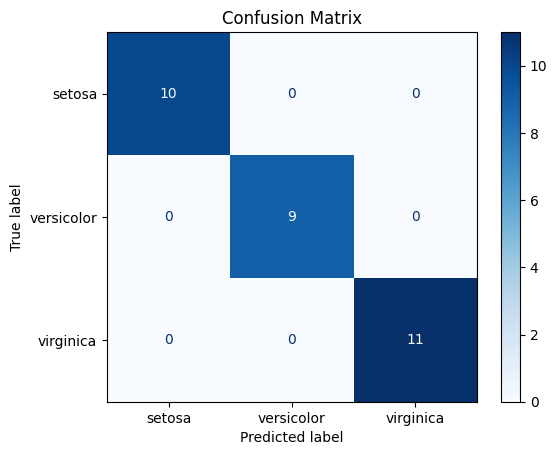

In [13]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **2.7 Computing Performance Metrics**

In [14]:
# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred) # Sum of Correct Predictions / Total Number of Predictions
report = classification_report(y_test, y_pred, target_names=iris.target_names) # summarizes the metrics for each class
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negatives / (True Negatives + False Positives)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision: 1.0000
Recall: 1.0000
Specificity: 1.00
F1-Score: 1.0000


---

### **3. Support Vector Machine (SVM)**

This is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates data points of different classes in a high-dimensional space.

SVM aims to maximize the margin between the closest points of each class (support vectors) and the hyperplane, which enhances the model's ability to generalize to unseen data. SVM can also use kernel functions to handle non-linear separations by transforming the input space into higher dimensions.

Steps to Perform SVM on the Iris Dataset:
1. **Import Libraries:** Import the necessary libraries for data manipulation, modeling, and evaluation.

2. **Load the Dataset:** I already loaded it into a data frame

3. **Split the Dataset:** I already split the data into training and testing sets

4. **Train the Model:** Instantiate the Naive Bayes classifier and fit it to the training data.

5. **Make Predictions:** Use the trained model to make predictions on the test set.

6. **Display the Confusion Matrix:** Generate and visualize the confusion matrix to evaluate the model's predictions.

7. **Compute Performance Metrics:** Calculate accuracy, recall, F1-score, and any other relevant metrics.

#### **3.1 Import Libraries**

- I will import the SVM library, since the rest have been imported in previous code blocks

In [15]:
from sklearn.svm import SVC

Since steps `3.2` & `3.3` have been completed in the KNN classification we move on to `3.4`

#### **3.4 Training the SVM model**
- I will create an instance of the Support Vector Classifier (SVC) from the sklearn.svm module.
- Then I will train the SVM model using the training dataset

But first let's run k-cross cross-validation to determine which is the best kernel to use for the model (linear, polynomiol, radial basis function, or even sigmoid) based on performance.

Kernel Functions:
- **Linear Kernel:** This is used when the data is linearly separable in the feature space. It creates a hyperplane that separates the classes with a straight line (or flat hyperplane in higher dimensions).

- **Radial Basis Function (RBF) Kernel:** This is a popular choice for non-linear data. It maps input features into an infinite-dimensional space, allowing complex boundaries between classes.

- **Polynomial Kernel:** This kernel allows for polynomial decision boundaries and can model interactions between features.

- **Other kernels** can also be specified, such as 'sigmoid' and custom kernels, depending on the problem's requirements.

In [16]:
# I had already imported cross_val_score in a previos code block

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    scores = cross_val_score(svm_model, X, y, cv=5)  # 5-fold cross-validation
    print(f'Kernel: {kernel}, Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')


Kernel: linear, Accuracy: 0.98 ± 0.02
Kernel: poly, Accuracy: 0.98 ± 0.02
Kernel: rbf, Accuracy: 0.97 ± 0.02
Kernel: sigmoid, Accuracy: 0.07 ± 0.06


We will go with the linear kernel

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


#### **3.5 Make Predictions**

In [18]:
y_pred = svm_model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


#### **3.6 Displaying the confusion matrix**

In [19]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


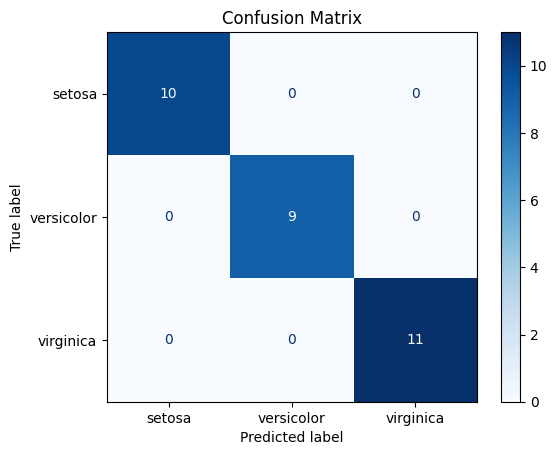

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **3.7 Evaluating Performace Metrics**

In [21]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision: 1.0000
Recall: 1.0000
Specificity: 1.00
F1-Score: 1.0000


### **4. Decision Tree**
A Decision Tree classifies by recursively splitting data into subsets based on the most significant feature.

**How it works:**

- At each node, select the feature that best separates classes (using Gini impurity or Information Gain/Entropy).

- Split data into branches.

- Repeat until pure nodes or stopping criteria (max depth, min samples) are met.

- Classify new data by traversing the tree to a leaf and outputting the majority class.

**Steps to perform Decision Tree Classification on the Iris Dataset:**
1. Importing Libraries
2. Creating and Training the Decision Tree model
3. Making Predictions
4. Displaying the Confusion Matrix
5. Evaluating the model's metrics
6. Visualizing the Decision Tree

#### **4.1 Importing Libraries**

- `DecisionTreeClassifier`
- `plot_tree`

In [22]:
from sklearn.tree import DecisionTreeClassifier # creates & trains model
from sklearn.tree import plot_tree # visualizes the trained tree structure

#### **4.2 Creating and Training the Decision Tree mode**

Let's first determine the best parameters to use using `GridSearchCV`

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [24]:
best_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_dt_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

#### **4.3 Make Predictions**

In [25]:
y_pred = best_dt_model.predict(X_test)


#### **4.4 Display confusion Matrix**

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


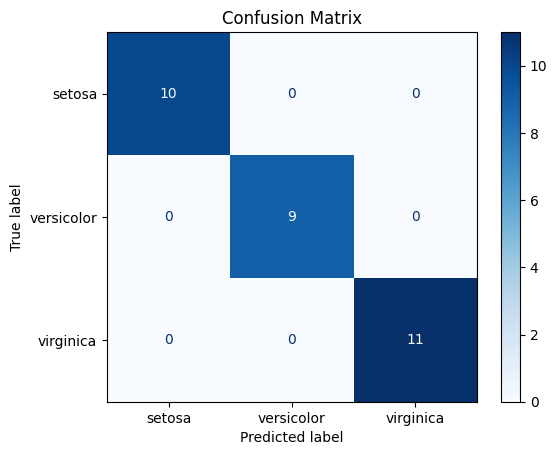

In [26]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:\n', cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### **4.5 Evaluationg the model's metrics**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print(f'Specificity: {specificity:.2f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Specificity: 1.00
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


#### **4.6 Visualize the Decision Tree**

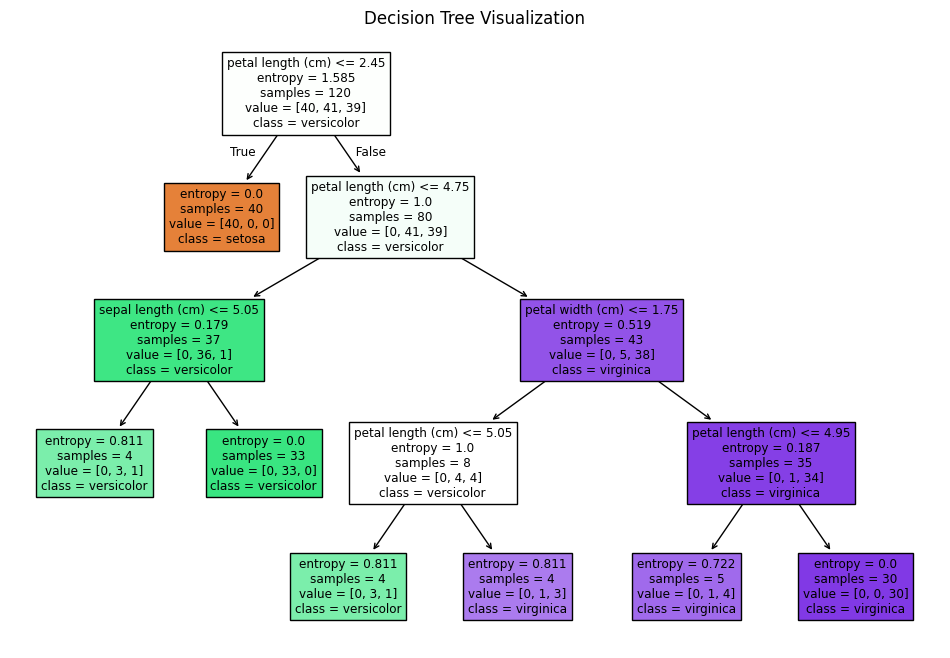

In [28]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Visualization')
plt.show()

### **5. Random Forest Classification**

This is an ensemble method combining multiple decision trees:

**How it works:**

- Creates many trees on bootstrap samples (random sampling with replacement)

- Each split considers random subset of features (feature bagging)

- Final prediction = majority vote (classification) or average (regression)

**Steps to implment Random Forest**:
1. Import Libraries
2. Train the Random Forest Model
3. Make Predictions
4. Display confusion matrix
5. Compute Metrics


#### **5.1 Import Libreries**

In [29]:
from sklearn.ensemble import RandomForestClassifier

#### **5.2 Train Random Forest Model**

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

#### **5.3 Make Predictions**

In [31]:
y_pred = rf_model.predict(X_test)

#### **5.4 Display Confusion matrix**

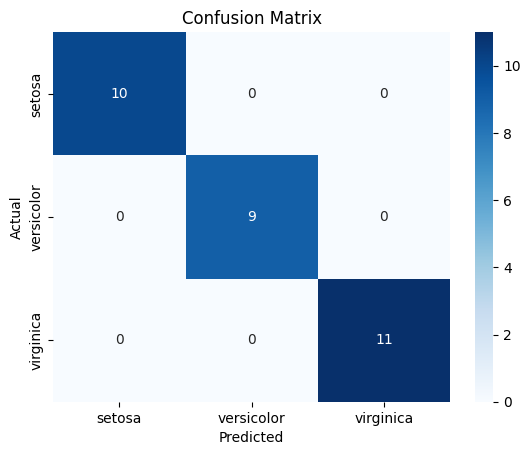

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **5.5 Evaluate Metrics**

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


# **Regression Algorithms**

## **Step 1**

I will import the California dataset and use it to implement the algorithms below

> The official scikit-learn California Housing dataset contains **20,640 samples** with **8 numeric features** and **1 target** variable, **no missing values**

**Features (all per block group)** :
- `MedInc`: Median income
- `HouseAge`: Median house age  
- `AveRooms`: Average rooms per household
- `AveBedrms`: Average bedrooms per household
- `Population`: Block group population
- `AveOccup`: Average household members
- `Latitude` / `Longitude`: Geographic coordinates

**Target**: `MedHouseVal` - Median house value (**$100,000 units**)

Derived from **1990 U.S. census**; regression task only (not classification) .

### **Loading & making a dataframe for the California Housing Dataset**

- I will import the official scikit-learn California dataset together with libraries that will be used in this section
- I will create a dataframe for the dataset with target values
- I will display the first few rows

In [34]:
from sklearn.datasets import fetch_california_housing # importing the dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for metrics evaluation

In [35]:
# Load dataset
housing = fetch_california_housing()

# Create dataframe
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target  # Add target column

print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


## **Step 2**

We will carry out the following regression systems:
- Linear Regression

- Polynomial Regression

- Lasso Regression

- Ridge Regression

Ensuring the following steps are carried out fpr each model:
- Train the model

- Make predictions

- Evaluate using MAE, MSE, RMSE, and R²



### **1. Linear Regression**

**Definition**
So based on what I've found out, this algorithm models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It assumes the relationship is approximately linear and finds the optimal coefficients (weights) that minimize the sum of squared residuals between actual and predicted values. For a single feature, it's a line ($y = mx + b$); for multiple features, it's a hyperplane ($y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$). It's simple, interpretable, and serves as a baseline for regression tasks, but assumes linearity, independence, homoscedasticity, and normality of errors.

**Steps to implement Linear Regression:**
1. Import necessary libraries & prepare Features and Target
2. Split data
3. Train Linear Regression Model
4. Make Predictions
5. Evaluate the model
6. Cross-validation
7. View Coefficients
8. Show first few predictions

#### **1.1 Prepare features and target**

Separates features (predictors) from target (what we're predicting).

- `X`: Feature matrix - all columns used to make predictions (MedInc, HouseAge, etc.)

- `y`: Target vector - the value we want to predict (median house value)

In [36]:
# Step 1: Prepare features and target & import libraries
from sklearn.linear_model import LinearRegression

X = housing_df.drop('target', axis=1)
y = housing_df['target']

#### **1.2 Split the data**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **1.3 Train the Linear Regression Model**

In [38]:
# Step 3: Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### **1.4 Make predictions**

In [39]:
y_pred = lr.predict(X_test)

#### **1.5 Evaluate model**

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: ${rmse*100000:.2f}')
print(f'MAE: ${mae*100000:.2f}')
print(f'R² Score: {r2:.4f}')

RMSE: $74558.14
MAE: $53320.01
R² Score: 0.5758


#### **1.6 Cross-validation**

Cross-validation is necessary because:

1. **More reliable estimate:** The single train/test split R² might be lucky or unlucky. CV averages performance across 5 different splits.

2. **Detects overfitting:** If CV score is much lower than test score, your model is overfitting.

3. **Better use of data:** Every sample gets used for both training and validation.

4. **Stability check:** The standard deviation tells you if performance varies wildly across different data subsets.

In [41]:
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f'Cross-val R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')

Cross-val R²: 0.5530 (+/- 0.0617)


This means:

- **Average R²:** ~55.3% of variance in house prices is explained by the model across the 5 folds

- **Stability:** ±0.0617 standard deviation - performance varies by about 6 percentage points depending on which data subset is used for validation

#### **1.7 View Coeficients**

Shows which features most influence predictions and how they affect house values.

In [42]:
coef_df = pd.DataFrame({'Feature': housing.feature_names, 'Coefficient': lr.coef_})
print(coef_df.sort_values('Coefficient', key=abs, ascending=False))

      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002


#### **1.8 Show first few predictions vs actual**

In [43]:
# Step 8: Show first few predictions vs actual
results_df = pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5]})
print(results_df)

        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


Despite potentially decent aggregate metrics, model fails on specific cases

Based on these results, I think Linear regression is too rigid for this data, maybe I have possible missing features, or I should try `log(price)` instead

### **2. Polynomial Regression Algorithm**

**Polynomial Regression** is a form of regression analysis that models the relationship between variables as an
-th degree polynomial.

**Steps to implement Polynomial Regression**:
1. Import Libraries
-  Load the Carlifornia Dataset (Already achieved in the previous algorithm)
-  Split the Dataset (Already achieved in the previous algorithm)
2. Create Polynomial Features
3. Train the Model
4. Make predictions
5. Evaluate the model

#### **2.1 Import Libraries**

- import `PolynomialFeatures` class, that is essential for transforming input features into polynomial features, enabling polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

#### **2.2 Create Polynomial Features**

In [45]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)

x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform

#### **Train The Model**
Creating a lear regression model to fit it to the trasformed training data

In [46]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### **Make Predictions**
I will use the trained model to make predicions on the test set

In [48]:
y_pred = model.predict(poly_features.transform(X_test))

#### **Evaluate the Model**
I will use Mean Absolute Error(MAE), Mean Squared Error(MSE), Root Mean Squared Error(RMSE), and $R^2$ score

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


MAE: 0.47
MSE: 0.46
RMSE: 0.68
R²: 0.65


### **3. Lasso Regression**
**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that incorporates L1 regularization. It adds a penalty equal to the absolute value of the magnitude of coefficients to the loss function, which helps prevent overfitting and can lead to sparse models by driving some coefficients to zero. This makes Lasso useful for feature selection in high-dimensional datasets.

**Steps to implement the Lasoo Regression:**
1. Import Libraries
2. Train the model
3. Make Predictions
4. Evaluate the model

#### **3.1 Import Libraries**

- import `Lasso`: This class is used to implement Lasso Regression, which applies L1 regularization to linear regression models, helping to prevent overfitting and enabling feature selection by shrinking some coefficients to zero.

In [50]:
from sklearn.linear_model import Lasso

#### **3.2 Train the Model**
Create a Lasso regression model and fit it to the training data.

In [51]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


#### **3.3 Make Predictions**
Use the trained Lasso model to make predictions on the test set.

In [52]:
y_pred = lasso_model.predict(X_test)

#### **3.4 Evaluate the Model**
Calculate evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.76
MSE: 0.94
RMSE: 0.97
R²: 0.28


### **4. Ridge Regression**

**Ridge Regression** is a linear regression technique that incorporates L2 regularization. It adds a penalty equal to the square of the magnitude of coefficients to the loss function, which helps prevent overfitting by shrinking the coefficients of less important features towards zero. Ridge regression is particularly useful when dealing with multicollinearity or when the number of predictors exceeds the number of observations, as it stabilizes the estimation of coefficients.

**Steps to implement ridge regression:**
1. Import Libraries
2. Train Model
3. Make Predictions
4. Evaluate the Model

#### **4.1 Import Libraries**


In [54]:
from sklearn.linear_model import Ridge

#### **4.2 Train the Model**

In [55]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed
ridge_model.fit(X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


#### **4.3 Make Predictions**

In [56]:
y_pred = ridge_model.predict(X_test)

#### **4.4 Evaluate the Model**

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.53
MSE: 0.56
RMSE: 0.75
R²: 0.58
